### Data Science & Business Analytics
# Author : Savan Hake
## Task 1 : Regression Analysis using Machine Learning
### In this task, I have predicted  the percentage of marks that a student is expected to score based upon the number of hours they studied. As this involves two variables only, it is simple linear regression. 

## Step 1: Importing the required libraries

In [44]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

## Step 2: Reading the data from source

In [45]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [55]:
s_data.shape

(25, 2)

In [56]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [57]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [58]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Step 3:  Data Visualisation 
### Plotting the data points on 2-D graph to see if we can manually find any relationship like correlation between the data. 


C:\Users\Savankumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


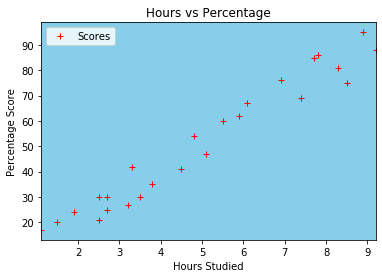

In [66]:
s_data.plot(x='Hours', y='Scores', style='+', color='red')
ax = plt.axes()
ax.set_facecolor('skyblue')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### As we can see from the plot,  there is a positive linear relation between the number of hours studied and percentage of score

## Step 4: Data Preparation

#### First we have to divide data into attributes & labels

In [67]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values 

## Step 5: Model Training
#### Splitting data into train & test sets & applying by using Scikit-Learn's built-in train_test_split() method

In [68]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [69]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


## Step 6: Plotting the Regression Line

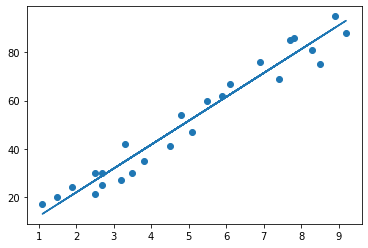

In [70]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Step 7: Prediction

In [72]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### Comparing Actual vs Predicted data

In [73]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### We can test now for any other value

## Step 8: Predicting score if student study for 9.25 hour

In [80]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


#### Hence from the above values we can say that if a student study for 9.25 hour, his predicted score willbe 93.69%

## Step 9: Evaluating the model
#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. We have evaluted performance by the mean square error & mean absolute error.


### Mean Absolute Error

In [82]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### Mean Squared Error

In [83]:
from sklearn import metrics  
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Squared Error: 21.5987693072174


### Thank You !